In [15]:
import pandas as pd
import numpy as np
import datetime

In [2]:
import matplotlib.pyplot as plt
from sklearn import cluster
from collections import Counter

In [3]:
train = pd.read_csv("D:/coding/kaggle/sberbank/data/train.csv")
test = pd.read_csv("D:/coding/kaggle/sberbank/data/test.csv")

In [4]:
print train.shape
print test.shape

(30471, 292)
(7662, 291)


In [23]:
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,datetime
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,4,0,13,22,1,0,52,4,5850000,2011-08-20
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,3,0,15,29,1,10,66,14,6000000,2011-08-23
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,3,0,11,27,0,4,67,10,5700000,2011-08-27
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,2,1,4,4,0,0,26,3,13100000,2011-09-01
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,108,17,135,236,2,91,195,14,16331452,2011-09-05


In [10]:
### NA summary from the training data
na_df = train.isnull().sum()
na_df_test = test.isnull().sum()
na_df.to_csv("na_summary.csv")
na_df_test.to_csv("na_summary_test.csv")

In [22]:
train['datetime'] =  pd.to_datetime(train['timestamp'], format='%Y-%m-%d')

In [62]:
train['price_doc'].groupby(train['datetime'].map(lambda x: x.year)).max()

datetime
2011     37000000
2012    111111112
2013     91066096
2014     80777440
2015     95122496
Name: price_doc, dtype: int64

[  26    3   22   92   67  514 2680 5330 4159 2352 3022 2472 2888  942 1232
 1943  894  371  223  218  248  105   92   94   77   58   55   59   29   25
   20   30   12   43   14    6    7    6    2]


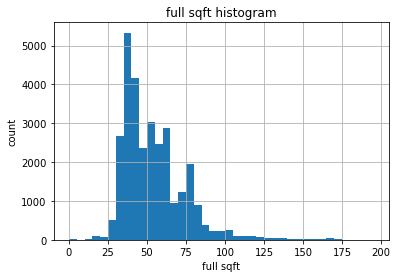

In [119]:
x = train['full_sq']
count, division = np.histogram(x, bins = range(0,200,5) )
x.hist(bins=division)
print count
plt.xlabel('full sqft')
plt.ylabel('count')
plt.title('full sqft histogram')
plt.show()

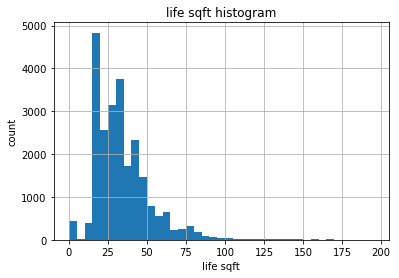

In [118]:
x = train[train.life_sq.notnull()]['life_sq']
count, division = np.histogram(x, bins = range(0,200,5) )
x.hist(bins=division)
plt.xlabel('life sqft')
plt.ylabel('count')
plt.title('life sqft histogram')
plt.show()

[ 233 1075 1415 2331 3504 5053 5026 3397 2278 1349 1040  851  670  477  378
  277  213  152  123   75   64   51   63   43   35   39   19   25   17   17
   14   10   15    9   12   10    9   11    4    5    9    5    5    2    8
    8    1    1    2]


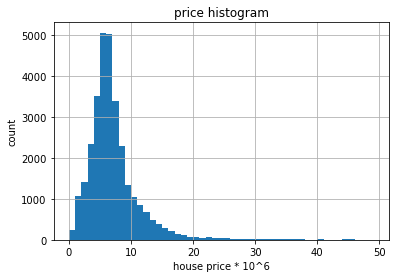

In [117]:
x = train['price_doc']/1000000
count, division = np.histogram(x, bins = range(0,50,1) )
x.hist(bins=division)
print count
plt.xlabel('house price * 10^6')
plt.ylabel('count')
plt.title('price histogram')
plt.show()